In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt                   # For charts and visualizations
from IPython.display import Image                 # For displaying images in the notebook
from IPython.display import display 
from sklearn.model_selection import train_test_split 
import lightgbm as lgb


In [4]:
def dateparse(d):
    return pd.to_datetime(d)

In [30]:
df = pd.read_csv(os.path.join(os.getcwd(), 'data/','trainset_full.csv'),
                        encoding= 'unicode_escape', low_memory=False, parse_dates=['measured_at'], date_parser=dateparse)
df = df.drop(columns=['index','measured_at'])

df = df[df.columns.difference(['nacelle_direction','generator_speed','power'])] # no explanatory power 
#df['error'] = (df['error_category'] != 'NO_ERROR').astype(int) 


In [31]:
df = df[~df['error_category'].isin(['ERROR=23','ERROR=29','ERROR=27','ERROR=7'])] # not enough samples

In [34]:
err = {'error_category': {'ERROR=12':1, 'ERROR=17':2, 'ERROR=3':3, 'ERROR=5': 4, 'ERROR=19': 5, 'ERROR=24':6, 
                          'ERROR=28':7, 'ERROR=8': 8, 'ERROR=20':9, 'ERROR=31':10, 'ERROR=30':11, 'ERROR=22':12,
                          'ERROR=25':13, 'NO_ERROR':0}}
df = df.replace(err)

In [35]:
y = df.error_category
X = df.drop(columns=['error_category'])

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    stratify=y,
                                                    test_size=0.25,
                                                    random_state=203758) 


In [58]:
params = {
            'boosting_type': 'gbdt',
            'objective': 'multiclass',
            'num_class':14,
            'subsample': 0.5,
            'subsample_freq': 1,
            'learning_rate': 0.03,
            'class_weight': 'balanced',
            'min_data_in_leaf': 1,
            'feature_fraction': 0.5,
            'max_bin': 10000,
            'n_estimators': 50,
            'boost_from_average': False,
            "random_seed":42}

from lightgbm import LGBMClassifier
model = LGBMClassifier()
model.set_params(**params)

LGBMClassifier(boost_from_average=False, class_weight='balanced',
               feature_fraction=0.5, learning_rate=0.03, max_bin=10000,
               min_data_in_leaf=1, n_estimators=50, num_class=14,
               objective='multiclass', random_seed=42, subsample=0.5,
               subsample_freq=1)

In [59]:
model.fit(X_train,y_train) # fit binary components

[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] min_data_in_leaf is set=1, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1


LGBMClassifier(boost_from_average=False, class_weight='balanced',
               feature_fraction=0.5, learning_rate=0.03, max_bin=10000,
               min_data_in_leaf=1, n_estimators=50, num_class=14,
               objective='multiclass', random_seed=42, subsample=0.5,
               subsample_freq=1)

In [79]:
y_pred = model.predict(X_test)

In [80]:
from sklearn import metrics 
print(f"Test's f1: {metrics.f1_score(y_test, y_pred, average='macro'):.5f}")

Test's f1: 0.78951


In [62]:
import numpy as np
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [67]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred, average=None)

array([0.99857472, 0.96658632, 0.9743826 , 0.91582763, 0.92744224,
       0.93041096, 0.79458795, 0.96075778, 0.92844037, 0.96103896,
       0.98373984, 0.90526316, 0.82539683, 0.875     ])

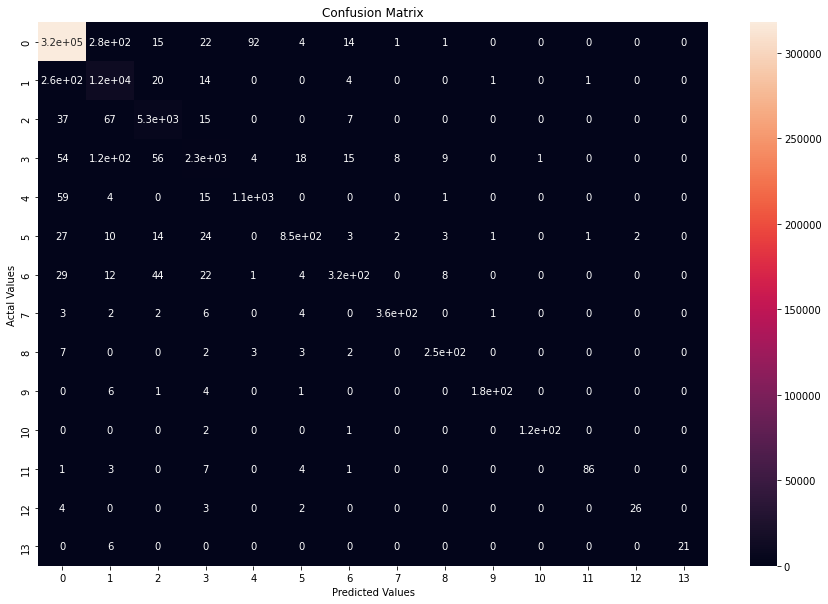

In [63]:
import seaborn as sns
plt.figure(figsize=(15,10))
sns.heatmap(cm, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

err = {'error_category': {'ERROR=12':1, 'ERROR=17':2, 'ERROR=3':3, 'ERROR=5': 4, 'ERROR=19': 5, 'ERROR=24':6, 
                          'ERROR=28':7, 'ERROR=8': 8, 'ERROR=20':9, 'ERROR=31':10, 'ERROR=30':11, 'ERROR=22':12,
                          'ERROR=25':13, 'NO_ERROR':0}}